In [96]:
import numpy as np
import sympy as sy

In [97]:
V = sy.Matrix([
    [1, 1],
    [1, -1]
])

V = V / np.sqrt(2)
V

Matrix([
[0.707106781186547,  0.707106781186547],
[0.707106781186547, -0.707106781186547]])

In [98]:
sigma = sy.Symbol("sigma")
sigma**2

sigma**2

In [99]:
L = sy.Matrix([
    [sigma**2, 0],
    [0, 1]
])
L

Matrix([
[sigma**2, 0],
[       0, 1]])

In [100]:
S = V * L * V.T
S

Matrix([
[0.5*sigma**2 + 0.5, 0.5*sigma**2 - 0.5],
[0.5*sigma**2 - 0.5, 0.5*sigma**2 + 0.5]])

In [101]:
S_inv = sy.simplify(S.inv())
S_inv

Matrix([
[ 0.5 + 0.5/sigma**2, -0.5 + 0.5/sigma**2],
[-0.5 + 0.5/sigma**2,  0.5 + 0.5/sigma**2]])

In [102]:
mu_0 = sy.Matrix([0, 0])
mu_1 = sy.Matrix([1, 0])

normal_vector = ((mu_0 - mu_1).T * S_inv).T
normal_vector

Matrix([
[-0.5 - 0.5/sigma**2],
[ 0.5 - 0.5/sigma**2]])

In [103]:
a = sy.Symbol("a")
b = sy.Symbol("b")
c = sy.Symbol("c")

theta = sy.Matrix([a, b])
theta

Matrix([
[a],
[b]])

In [104]:
x0 = sy.Symbol("x_0")
y0 = sy.Symbol("y_0")

P = sy.Matrix([x0, y0])
P

Matrix([
[x_0],
[y_0]])

In [105]:
(P.dot(theta.normalized()) - c/theta.norm()).simplify()

(a*x_0 + b*y_0 - c)/sqrt(Abs(a)**2 + Abs(b)**2)

Perceptron

In [142]:
import numpy as np

d = 2
def generate_x_arr(d):
    x_array = []
    for i in range(1, d+1):
        x = [np.cos(np.pi*t) if t==i else 0 for t in range(1, d+1)]
        x_array.append(x)
    return np.array(x_array)
    
generate_x_arr(3)

def generate_random_y_arr(d):
    y_array = []
    for i in range(d):
        y = (1 if np.random.random() > 0.5 else -1)
        y_array.append(y)
    return np.array(y_array)

T = 10

def perceptron(T, d):
    x_arr = generate_x_arr(d)
    # np.random.shuffle(x_arr)
    y_arr = generate_random_y_arr(d)
    theta = np.zeros(d)
    updates = 0
    for k in range(T):
        for i in range(d):
            if y_arr[i] * np.dot(theta, x_arr[i, :]) <= 0:
                theta += y_arr[i]*x_arr[i, :]
                updates += 1
    print("num of updates =", updates)
    return theta

In [148]:
perceptron(10, 9)

num of updates = 9


array([ 1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.])

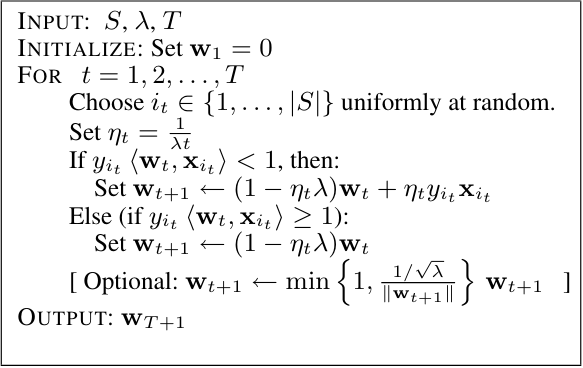

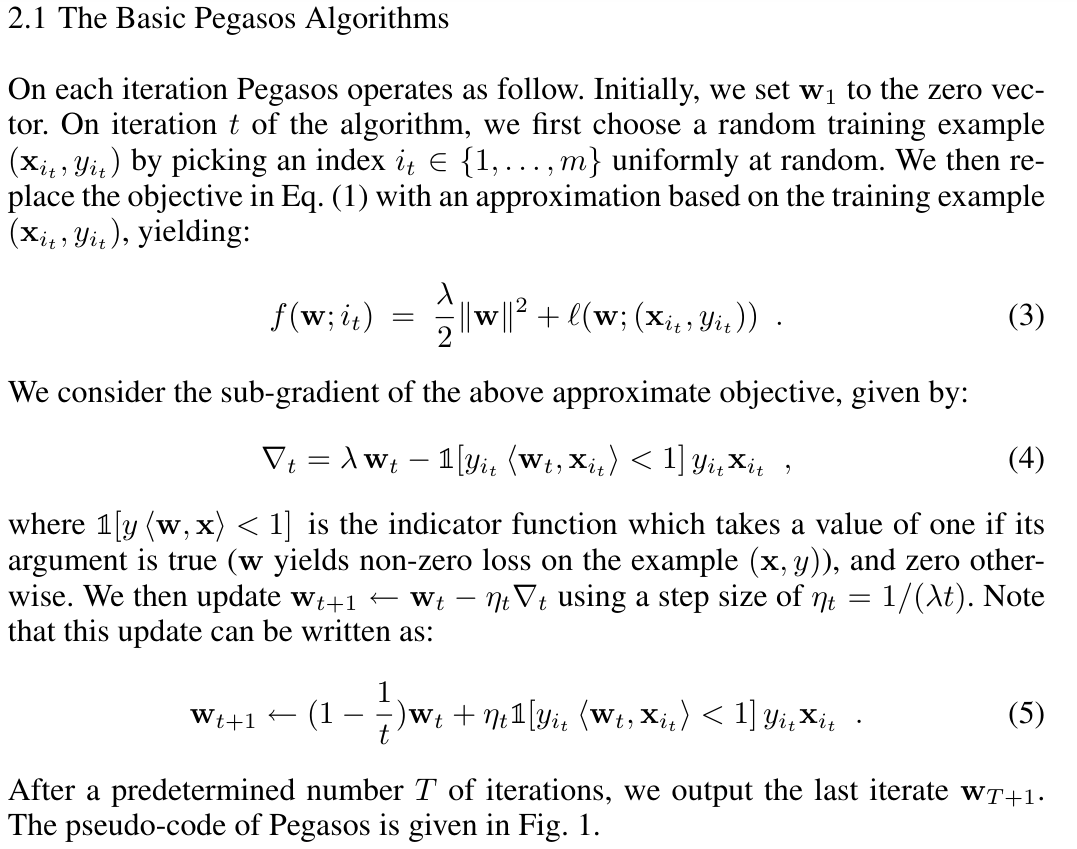